In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path='/users/cfassett/data/ml_experiments/build/'

In [4]:
data_lm = load_data(path);

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [ ]:
learn.load('fine_tuned_v4');

In [ ]:
learn.save_encoder('fine_tuned_v4_enc')

In [3]:
returnspath='/users/cfassett/data/ml_experiments/returns/'

In [ ]:
data_clas = (TextList.from_folder(returnspath, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_rand_pct()
             #split by default 20% to validation
             .label_from_folder(classes=['0','1', '2', '3'])
             #label them all with their folders
             .databunch(bs=32))

In [ ]:
data_clas.save('data_clas.pkl')

In [4]:
data_clas = load_data(returnspath, 'data_clas.pkl', bs=4)

In [5]:
data_clas.show_batch()

text,target
"xxbos 1 \n xxunk \n xxup form xxup 424b4 xxunk xxmaj filed pursuant to xxmaj rule 424(b)(4)registration xxmaj no . 333 - xxunk xxunk xxup prospectus xxunk xxunk xxmaj shares xxmaj common xxmaj stock \n \n \n xxmaj this is an initial public offering of shares of common stock of xxmaj xxunk xxmaj pharmaceuticals , xxmaj inc. xxmaj prior to this offering , there has been",0
xxbos 1 \n xxunk \n xxup 424b4 \n \n \n \n xxmaj use these links to rapidly review the document \n xxup table xxup of xxup contents \n xxup table xxup of xxup contents 2 \n xxmaj contents \n \n \n \n \n \n \n \n \n \n \n \n \n xxmaj table of xxmaj contents \n \n \n xxmaj filed xxmaj,0
xxbos 1 \n xxunk \n xxup 424b4 \n \n \n \n xxmaj use these links to rapidly review the document \n xxup table xxup of xxup contents \n xxup index xxup to xxup financial xxup statements \n \n \n \n \n \n \n \n \n \n \n \n \n xxmaj table of xxmaj contents \n xxmaj filed pursuant to xxmaj rule 424(b)(4,2
"xxbos 1 \n d424b4.htm \n xxup final xxup prospectus \n \n xxmaj final xxmaj prospectus \n xxmaj table of xxmaj contents \n xxmaj filed pursuant to xxmaj rule \n xxunk xxmaj no . 333 - xxunk \n 406,000,000 xxmaj shares xxup visa xxup inc . xxmaj class a xxmaj common xxmaj stock xxmaj this is xxmaj visa",2


In [5]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('/users/cfassett/data/ml_experiments/build/models/fine_tuned_v4_enc');

In [8]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


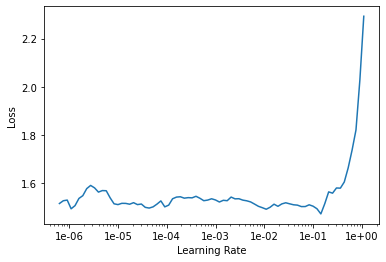

In [9]:
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(1, 1.8e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.242273,1.206748,0.484733,3:01:48


In [8]:
learn.save('return_classify2_v1')

# learn.freeze_to(-2)

In [10]:
learn.fit_one_cycle(1, slice(3e-3/(2.6**4),3e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.234946,1.194697,0.500000,2:56:16


In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()


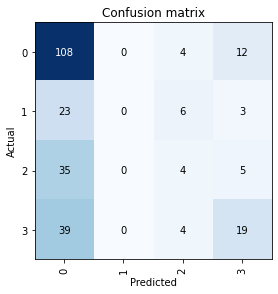

In [12]:
interp.plot_confusion_matrix()

In [13]:
learn.save('second2')

In [14]:
learn.load('second2');

In [15]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.139113,1.180905,0.500000,3:03:50


In [16]:
learn.save('third2')

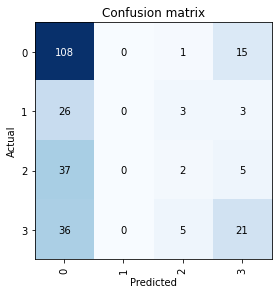

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix()

The above model behaves kind of interestingly ... it much more often predicts "0" (stay away) for all the companies than it predicts "1" (meh) or "2" (pretty good).  Many or most of the zero companies went bankrupt, fyi.  The other interesting behavior is that ~60% of the time, if the model was predicting "3", the result was class 2 or 3.  Class 2 had CAGR of 6-20% from IPO to now, which is frankly not to shabby.  Class 3 had >20% CAGR (although a few of these are young companies that maybe I should have filtered out). 

To do:
1) What is the model picking up on that leads it to predict class<>0?
2) Can we improve the prediction model?
3) How could this be backtested / applied?

In [6]:
learn.load('third2');

In [7]:
d1=data_clas.train_ds[0][0]

In [8]:
learn.predict(d1)

(Category tensor(3), tensor(3), tensor([0.3047, 0.0782, 0.1131, 0.5040]))